<a href="https://colab.research.google.com/github/rdwnhadi/LearningDataScience/blob/main/Tugas_NLP_(Pengelompokan_Jenis_Berita_Berdasarkan_Judul).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ridwan Hadi Kusuma
Peserta Fresh Graduate Academy (FGA)

In [131]:
#import library pandas
import pandas as pd
df = pd.read_csv('True.csv')

In [132]:
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [133]:
#membuang kolom text dan date
df = df.drop(columns=['text', 'date'])

In [134]:
df.head()

,title,subject
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews
1,U.S. military to accept transgender recruits o...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,politicsNews


In [135]:
#one hot encoding pada kolom subject
category = pd.get_dummies(df.subject)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='subject')
df_baru

,title,politicsNews,worldnews
0,"As U.S. budget fight looms, Republicans flip t...",1,0
1,U.S. military to accept transgender recruits o...,1,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,0
3,FBI Russia probe helped by Australian diplomat...,1,0
4,Trump wants Postal Service to charge 'much mor...,1,0
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,0,1
21413,LexisNexis withdrew two products from Chinese ...,0,1
21414,Minsk cultural hub becomes haven from authorities,0,1
21415,Vatican upbeat on possibility of Pope Francis ...,0,1


In [136]:
#membuat dataframe baru
judul_berita = df_baru['title'].values
label = df_baru[['politicsNews', 'worldnews',]].values

In [137]:
#import library sklearn untuk membagi data test dan latih dengan ukuran validasi 0.2
from sklearn.model_selection import train_test_split
judul_berita_latih, judul_berita_test, label_latih, label_test = train_test_split(judul_berita, label, test_size=0.2)

In [138]:
#tokenisasi dan padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=100, oov_token='x')
tokenizer.fit_on_texts(judul_berita_latih) 
tokenizer.fit_on_texts(judul_berita_test)
 
sekuens_latih = tokenizer.texts_to_sequences(judul_berita_latih)
sekuens_test = tokenizer.texts_to_sequences(judul_berita_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [146]:
#hidden layers, sequence, embedding, dan LSTM
import tensorflow as tf
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100, 16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #menggunakan binary karena hanya ada 2 klasifikasi

In [149]:
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 20, 16)            1600      
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                20736     
_________________________________________________________________
dense_67 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_68 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_70 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_71 (Dense)             (None, 2)               

In [147]:
#menggunakan callback untuk menstop pengujian jika akurasi sudah 95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [148]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
536/536 - 11s - loss: 0.4191 - accuracy: 0.8048 - val_loss: 0.3644 - val_accuracy: 0.8527
Epoch 2/30
536/536 - 8s - loss: 0.3575 - accuracy: 0.8502 - val_loss: 0.3629 - val_accuracy: 0.8494
Epoch 3/30
536/536 - 8s - loss: 0.3502 - accuracy: 0.8520 - val_loss: 0.3460 - val_accuracy: 0.8520
Epoch 4/30
536/536 - 7s - loss: 0.3424 - accuracy: 0.8553 - val_loss: 0.3542 - val_accuracy: 0.8562
Epoch 5/30
536/536 - 8s - loss: 0.3398 - accuracy: 0.8566 - val_loss: 0.3443 - val_accuracy: 0.8564
Epoch 6/30
536/536 - 8s - loss: 0.3396 - accuracy: 0.8568 - val_loss: 0.3467 - val_accuracy: 0.8543
Epoch 7/30
536/536 - 7s - loss: 0.3369 - accuracy: 0.8585 - val_loss: 0.3522 - val_accuracy: 0.8522
Epoch 8/30
536/536 - 7s - loss: 0.3337 - accuracy: 0.8610 - val_loss: 0.3439 - val_accuracy: 0.8532
Epoch 9/30
536/536 - 7s - loss: 0.3335 - accuracy: 0.8596 - val_loss: 0.3441 - val_accuracy: 0.8557
Epoch 10/30
536/536 - 7s - loss: 0.3304 - accuracy: 0.8609 - val_loss: 0.3454 - val_accuracy: 0.853

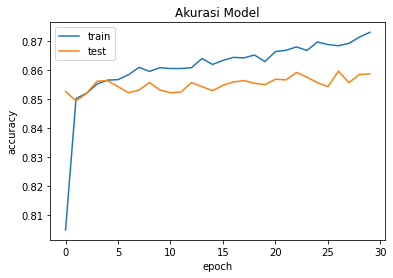

In [150]:
#membuat plot akurasi model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

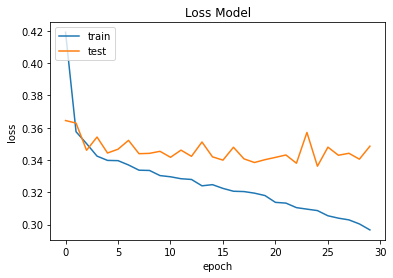

In [151]:
#membuat plot loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()